# Logstic Regression course

In [1]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from matplotlib.animation import FuncAnimation
from sklearn.datasets import fetch_openml

plt.style.use('default')

dataset = fetch_openml(name='boston', version=1, as_frame=True, return_X_y=False, parser='pandas')

In [2]:
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

dataframe = pd.DataFrame(data)
dataframe.columns = columns
dataframe['price'] = target

rm = dataframe['RM']
lstat = dataframe['LSTAT']
price = dataframe['price']

In [3]:
print(np.percentile(price, 66))
greater_then_most = np.percentile(price, 66)

23.53


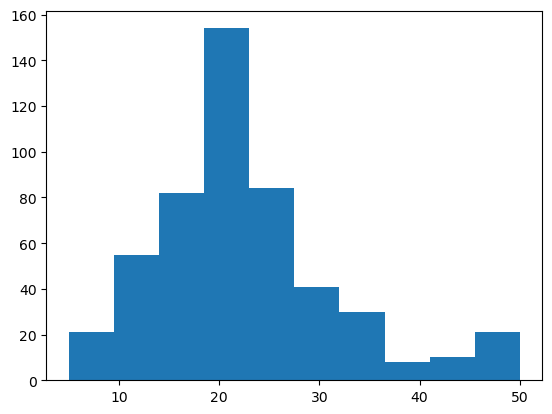

In [4]:
plt.hist(price)
plt.show()

In [5]:
dataframe['expensive'] = dataframe['price'].apply(lambda p: int(p > greater_then_most))
expensive = dataframe['expensive']

# print(dataframe.head())
print(dataframe['expensive'])

0      1
1      0
2      1
3      1
4      1
      ..
501    0
502    0
503    1
504    0
505    0
Name: expensive, Length: 506, dtype: int64


In [6]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

def model(x, w, b):
    return logistic(np.dot(x, w.T) + b)

def loss(yhat, y):
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

def partial_w(x, y, yhat):
    return np.array([np.sum((yhat - y) * x[0]), np.sum((yhat - y) * x[1])])

def partial_b(x, y, yhat):
    return np.sum((yhat - y))

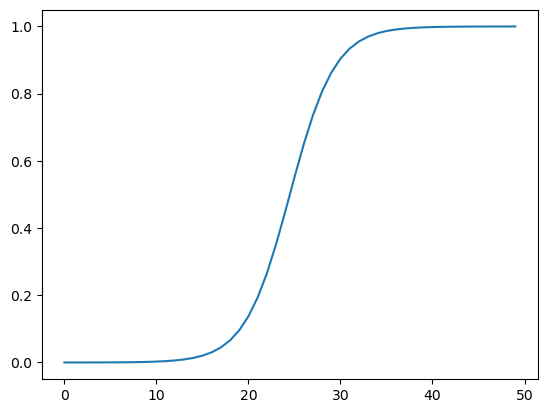

In [7]:
import matplotlib.pyplot as plt
plt.plot(logistic(np.linspace(-10, 10)))
plt.show()

In [8]:
w = np.random.random_sample((1, 2))
b = 0

In [9]:
learning_rate = 1e-5
epoch = 200
losses = []

history_k_b_loss = []

for i in range(epoch):
    batch_loss = []
    for batch in range(len(rm)):
        index = random.choice(range(len(rm)))

        x = np.array([rm[index], lstat[index]])
        y = expensive[index]

        yhat = model(x, w, b)
        loss_v = loss(yhat, y)

        w = w + -1 * partial_w(x, y, yhat) * learning_rate
        b = b + -1 * partial_b(x, y, yhat) * learning_rate

        batch_loss.append(loss_v)
        history_k_b_loss.append((w, b, loss_v))

        if batch % 100 == 0:
            print('Epoch: {}, Batch: {}, loss:{}'.format(i, batch, loss_v))
    losses.append(np.mean(batch_loss))

Epoch: 0, Batch: 0, loss:0.004598855082988402
Epoch: 0, Batch: 100, loss:0.0004457315977628876
Epoch: 0, Batch: 200, loss:0.0003525268163414668
Epoch: 0, Batch: 300, loss:0.0002798517724728992
Epoch: 0, Batch: 400, loss:6.863560737682943
Epoch: 0, Batch: 500, loss:11.147320299445326
Epoch: 1, Batch: 0, loss:18.73233463539772
Epoch: 1, Batch: 100, loss:2.1402795373728603e-05
Epoch: 1, Batch: 200, loss:10.708941484406113
Epoch: 1, Batch: 300, loss:16.737028327136787
Epoch: 1, Batch: 400, loss:6.59808640309302e-05
Epoch: 1, Batch: 500, loss:0.008279721304210856
Epoch: 2, Batch: 0, loss:8.735699920854486
Epoch: 2, Batch: 100, loss:27.910359527894524
Epoch: 2, Batch: 200, loss:19.802467565854002
Epoch: 2, Batch: 300, loss:25.407966226257425
Epoch: 2, Batch: 400, loss:21.79392183204692
Epoch: 2, Batch: 500, loss:0.002472646360297844
Epoch: 3, Batch: 0, loss:9.346097784570526
Epoch: 3, Batch: 100, loss:0.002418562753047264
Epoch: 3, Batch: 200, loss:0.0005935020971770816
Epoch: 3, Batch: 300,

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_65013/3082613545.py:8: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))


Epoch: 29, Batch: 500, loss:0.2772062261801063
Epoch: 30, Batch: 0, loss:1.0295529155086347
Epoch: 30, Batch: 100, loss:0.9987115799990594
Epoch: 30, Batch: 200, loss:0.8984143193938915
Epoch: 30, Batch: 300, loss:0.9105362976166823
Epoch: 30, Batch: 400, loss:0.0822551435077175
Epoch: 30, Batch: 500, loss:0.8807409949394169
Epoch: 31, Batch: 0, loss:0.049570891325467
Epoch: 31, Batch: 100, loss:0.23988220085177647
Epoch: 31, Batch: 200, loss:0.22266613175658828
Epoch: 31, Batch: 300, loss:1.4060918195212637
Epoch: 31, Batch: 400, loss:0.3901864961417459
Epoch: 31, Batch: 500, loss:0.3382021534868468
Epoch: 32, Batch: 0, loss:0.34599650730058384
Epoch: 32, Batch: 100, loss:0.2952521902287762
Epoch: 32, Batch: 200, loss:0.1292366129195449
Epoch: 32, Batch: 300, loss:1.1343987621989258
Epoch: 32, Batch: 400, loss:1.0506415107146363
Epoch: 32, Batch: 500, loss:1.1652589831706381
Epoch: 33, Batch: 0, loss:0.25264317596105795
Epoch: 33, Batch: 100, loss:0.4482726049480203
Epoch: 33, Batch: 

In [10]:
random_test_indices = np.random.choice(range(len(rm)), size=100)
decision_boundary = 0.5



for i in random_test_indices:
    x1, x2, y = rm[i], lstat[i], expensive[i]
    predicate = model(np.array([x1, x2]), w, b)
    predicate_label = int(predicate > decision_boundary)

    print('RM:{}, LSTAT:{}, EXPENSIVE:{}, Predicated:{}'.format(x1, x2, y, predicate_label))

boston_labels = np.array

RM:6.03, LSTAT:7.88, EXPENSIVE:0, Predicated:0
RM:6.176, LSTAT:12.04, EXPENSIVE:0, Predicated:0
RM:6.317, LSTAT:13.99, EXPENSIVE:0, Predicated:0
RM:6.758, LSTAT:3.53, EXPENSIVE:1, Predicated:1
RM:7.416, LSTAT:6.19, EXPENSIVE:1, Predicated:1
RM:4.926, LSTAT:29.53, EXPENSIVE:0, Predicated:0
RM:5.682, LSTAT:10.21, EXPENSIVE:0, Predicated:0
RM:7.489, LSTAT:1.73, EXPENSIVE:1, Predicated:1
RM:6.575, LSTAT:4.98, EXPENSIVE:1, Predicated:1
RM:4.519, LSTAT:36.98, EXPENSIVE:0, Predicated:0
RM:6.606, LSTAT:7.37, EXPENSIVE:0, Predicated:1
RM:6.727, LSTAT:5.29, EXPENSIVE:1, Predicated:1
RM:5.966, LSTAT:14.44, EXPENSIVE:0, Predicated:0
RM:6.63, LSTAT:4.7, EXPENSIVE:1, Predicated:1
RM:7.333, LSTAT:7.79, EXPENSIVE:1, Predicated:1
RM:5.663, LSTAT:8.05, EXPENSIVE:0, Predicated:0
RM:5.757, LSTAT:10.11, EXPENSIVE:0, Predicated:0
RM:6.484, LSTAT:18.68, EXPENSIVE:0, Predicated:0
RM:6.431, LSTAT:15.39, EXPENSIVE:0, Predicated:0
RM:7.875, LSTAT:2.97, EXPENSIVE:1, Predicated:1
RM:8.337, LSTAT:2.47, EXPENSIVE:1,

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_65013/2603075225.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicate_label = int(predicate > decision_boundary)


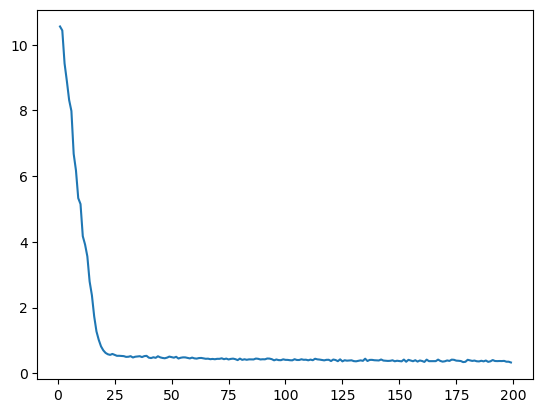

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(losses)

In [12]:
true_label = np.array([1, 0, 1, 0, 1]) # 二分类
predicate_1 = np.array([0.8, 0.7, 0.8, 0.3, 0.8])

In [13]:
def test_lose(y, yhat):
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

In [14]:
test_lose(true_label, predicate_1)

2.2300784022072975

![欢迎订阅：坍缩的奇点](../assets/Capture-2023-11-02-164446.png)